In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
plt.style.use('seaborn-v0_8-whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '../home-credit-default-risk/'

previous_application = pd.read_csv(path + 'previous_application.csv')
POS_CASH_balance = pd.read_csv(path + 'POS_CASH_balance.csv')
instalments_payments = pd.read_csv(path + 'installments_payments.csv')
credit_card_balance = pd.read_csv(path + 'credit_card_balance.csv')


print(f"Previous application shape: {previous_application.shape}")
print(f"POS CASH balance shape: {POS_CASH_balance.shape}")
print(f"Instalments payments shape: {instalments_payments.shape}")
print(f"Credit card balance shape: {credit_card_balance.shape}")

Previous application shape: (1670214, 37)
POS CASH balance shape: (10001358, 8)
Instalments payments shape: (13605401, 8)
Credit card balance shape: (3840312, 23)


 # Previous applicacation dataset

All previous applications for Home Credit loans of clients who have loans in our sample.

There is one row for each previous application related to loans in our data sample.

In [32]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
total = previous_application.isnull().sum().sort_values(ascending=False)
percent = (previous_application.isnull().sum() / previous_application.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_stats = missing_data[missing_data['Total'] > 0]
print("Top 10 columns with missing values:")
print(missing_stats.head(10))

Top 10 columns with missing values:
                             Total    Percent
RATE_INTEREST_PRIVILEGED   1664263  99.643698
RATE_INTEREST_PRIMARY      1664263  99.643698
AMT_DOWN_PAYMENT            895844  53.636480
RATE_DOWN_PAYMENT           895844  53.636480
NAME_TYPE_SUITE             820405  49.119754
DAYS_TERMINATION            673065  40.298129
DAYS_FIRST_DRAWING          673065  40.298129
DAYS_FIRST_DUE              673065  40.298129
DAYS_LAST_DUE_1ST_VERSION   673065  40.298129
DAYS_LAST_DUE               673065  40.298129


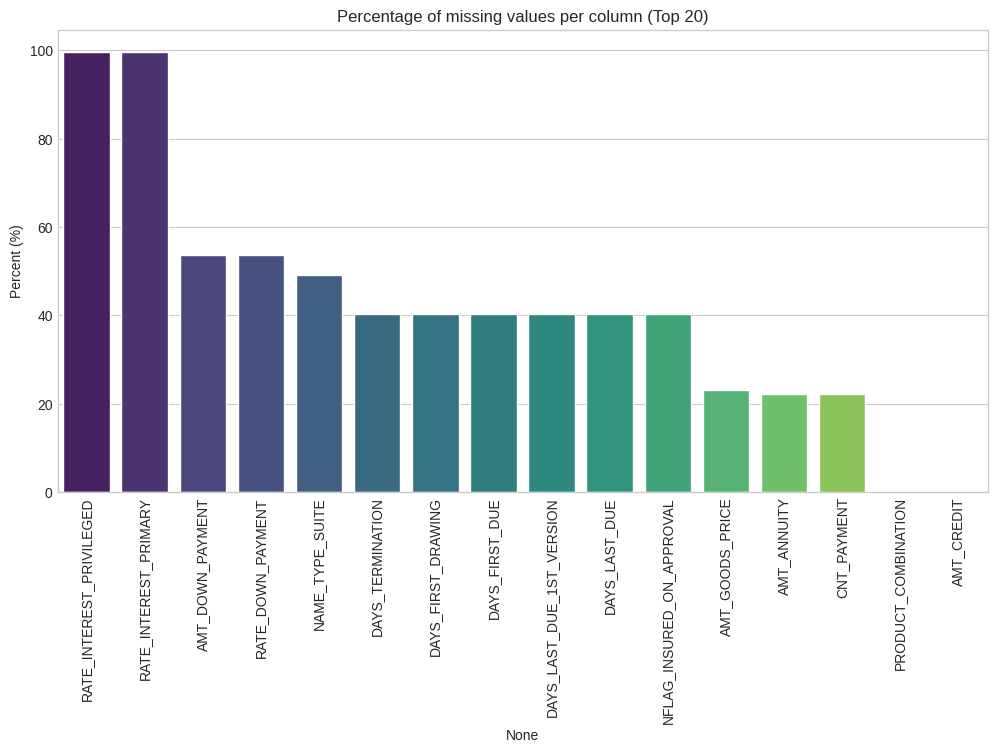

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_stats.index[:20], y=missing_stats['Percent'][:20], palette='viridis')
plt.xticks(rotation=90)
plt.title('Percentage of missing values per column (Top 20)')
plt.ylabel('Percent (%)')
plt.show()

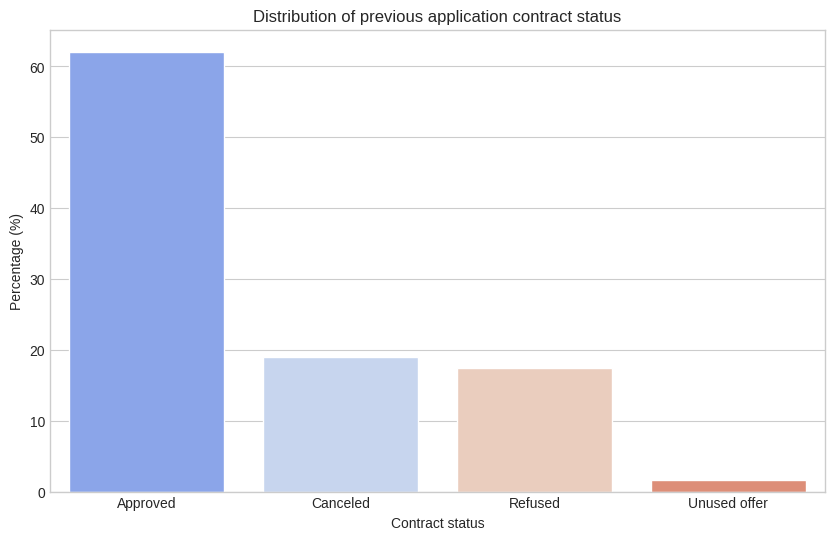

In [35]:
plt.figure(figsize=(10, 6))
status_dist = previous_application['NAME_CONTRACT_STATUS'].value_counts(normalize=True) * 100
sns.barplot(x=status_dist.index, y=status_dist.values, palette='coolwarm')

plt.title('Distribution of previous application contract status')
plt.ylabel('Percentage (%)')
plt.xlabel('Contract status')
plt.show()

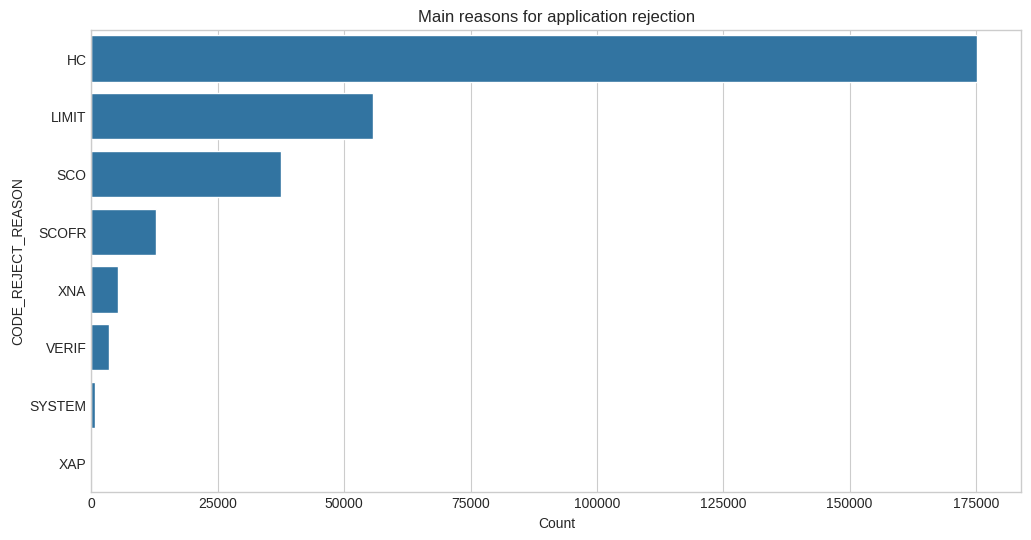

In [36]:
refused_apps = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Refused']
plt.figure(figsize=(12, 6))
sns.countplot(y='CODE_REJECT_REASON', data=refused_apps, order=refused_apps['CODE_REJECT_REASON'].value_counts().index)
plt.title('Main reasons for application rejection')
plt.xlabel('Count')
plt.show()

**SCO** - Scoring - odrzucenie przez model scoringowy

**LIMIT** - odrzucenie przez osiagniecie limitu zadluzenia w banku

**HC** - Home Credit - odrzucenie na podstawie wewnetrznych regul banku

**VERIF** - Verification - blad weryfikacji wniosku (np zle dane)

**SCORF** - Scoring Fraud - odrzucenie przez model przeciwko wyludzenia

**SYSTEM** - blad techniczny po stronie banku

**XNA** - nie dostepny powod

**XAP** - brak konkretnego powodu

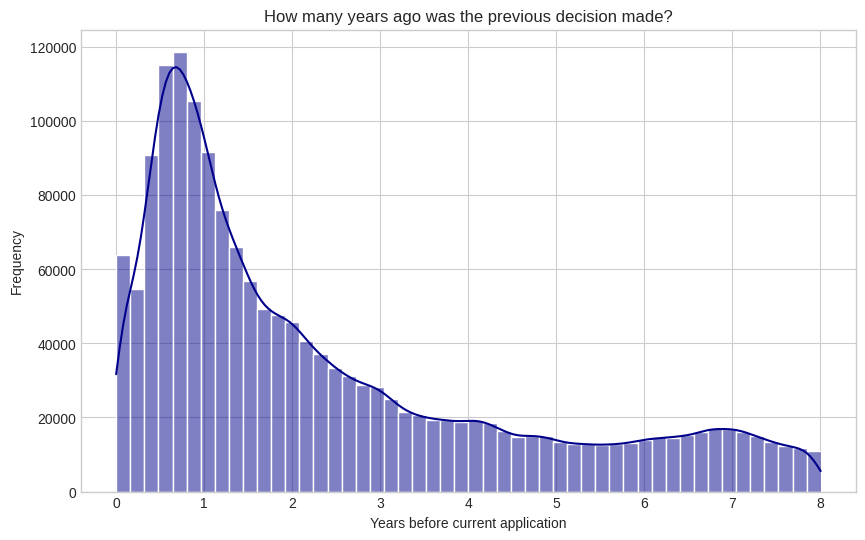

In [37]:
previous_application['YEARS_DECISION'] = previous_application['DAYS_DECISION'] / -365

plt.figure(figsize=(10, 6))
sns.histplot(data=previous_application, x='YEARS_DECISION', bins=50, kde=True, color='darkblue')
plt.title('How many years ago was the previous decision made?')
plt.xlabel('Years before current application')
plt.ylabel('Frequency')
plt.show()

In [41]:
numerical_cols = previous_application.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = previous_application.select_dtypes(include=['object']).columns.tolist()

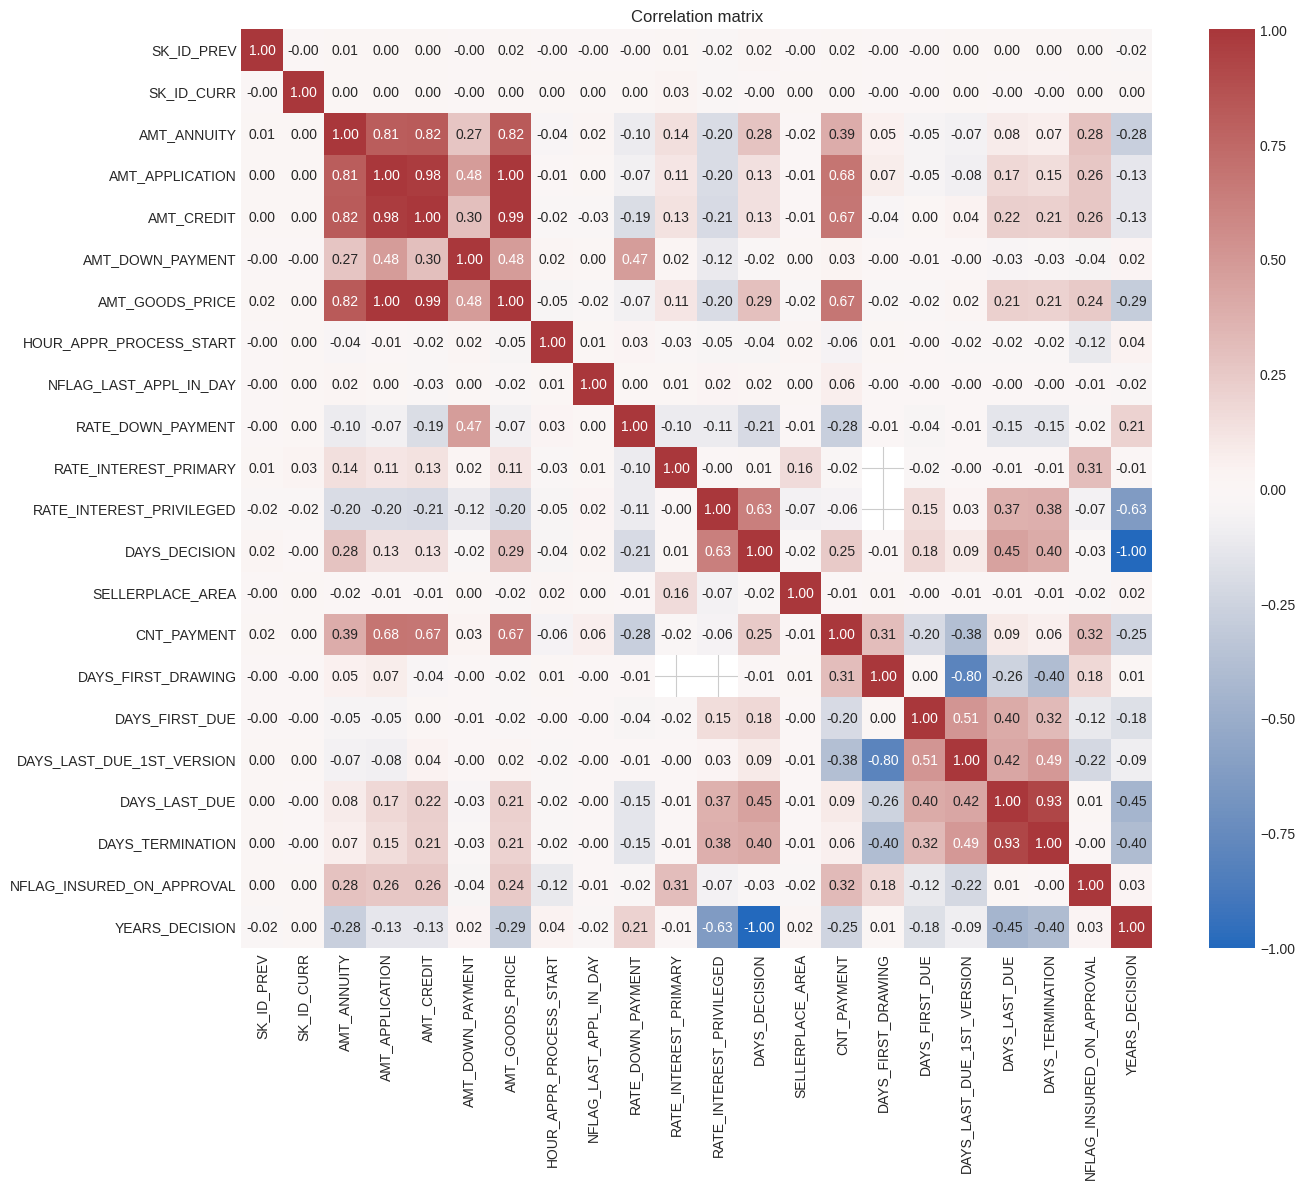

In [42]:
corr_cols = [col for col in numerical_cols if previous_application[col].notna().sum() > 0]
correlation_matrix = previous_application[corr_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='vlag')
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

In [44]:
print(f"Categorical columns: {categorical_cols}")
print()

for col in categorical_cols:
    print(previous_application[col].value_counts())
    print()

Categorical columns: ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64

WEEKDAY_APPR_PROCESS_START
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: count, dtype: int64

FLAG_LAST_APPL_PER_CONTRACT
Y    1661739
N       8475
Name: count, dtype: int64

NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                156

# POS CASH balance dataset

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.

This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

In [60]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [56]:
missing_pos = POS_CASH_balance.isnull().sum() / len(POS_CASH_balance) * 100
print("Missing values (%):\n", missing_pos[missing_pos > 0])

Missing values (%):
 CNT_INSTALMENT           0.260675
CNT_INSTALMENT_FUTURE    0.260835
dtype: float64


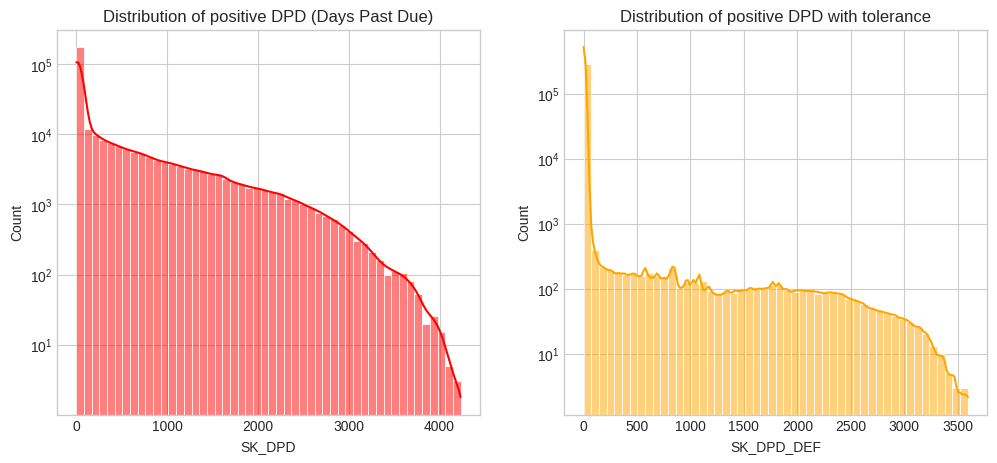

In [58]:
delays = POS_CASH_balance[POS_CASH_balance['SK_DPD'] > 0]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(delays['SK_DPD'], bins=50, kde=True, color='red')
plt.title('Distribution of positive DPD (Days Past Due)')
plt.yscale('log')

plt.subplot(1, 2, 2)
sns.histplot(delays['SK_DPD_DEF'], bins=50, kde=True, color='orange')
plt.title('Distribution of positive DPD with tolerance')
plt.yscale('log')
plt.show()

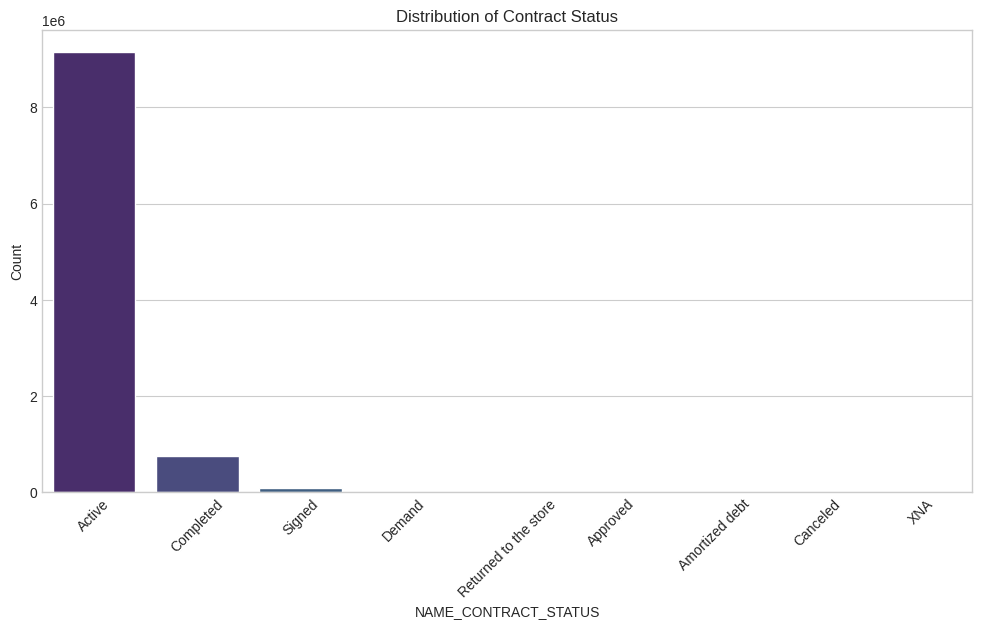

In [62]:
plt.figure(figsize=(12, 6))
status_counts = POS_CASH_balance['NAME_CONTRACT_STATUS'].value_counts()
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
plt.title('Distribution of Contract Status')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

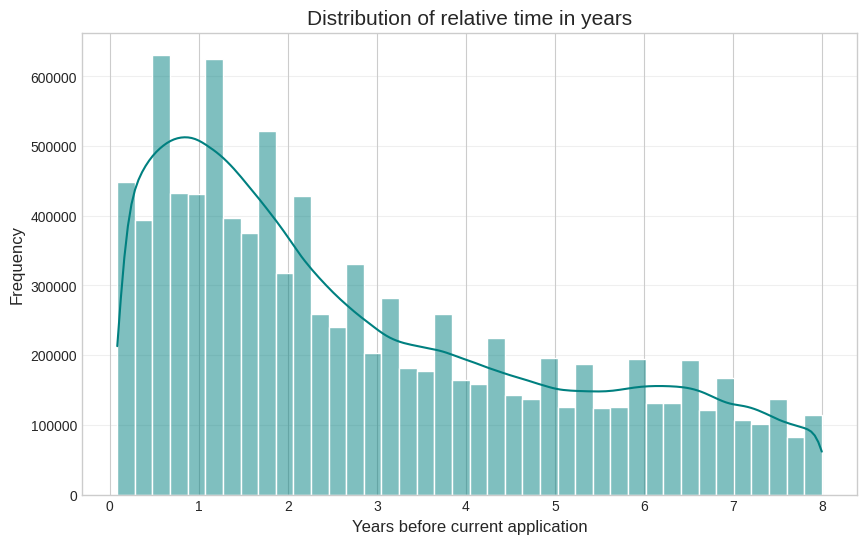

In [65]:
POS_CASH_balance['YEARS_BALANCE'] = POS_CASH_balance['MONTHS_BALANCE'].abs() / 12

plt.figure(figsize=(10, 6))
sns.histplot(POS_CASH_balance['YEARS_BALANCE'], bins=40, kde=True, color='teal')

plt.title('Distribution of relative time in years', fontsize=15)
plt.xlabel('Years before current application', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [66]:
numerical_cols = POS_CASH_balance.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = POS_CASH_balance.select_dtypes(include=['object']).columns.tolist()

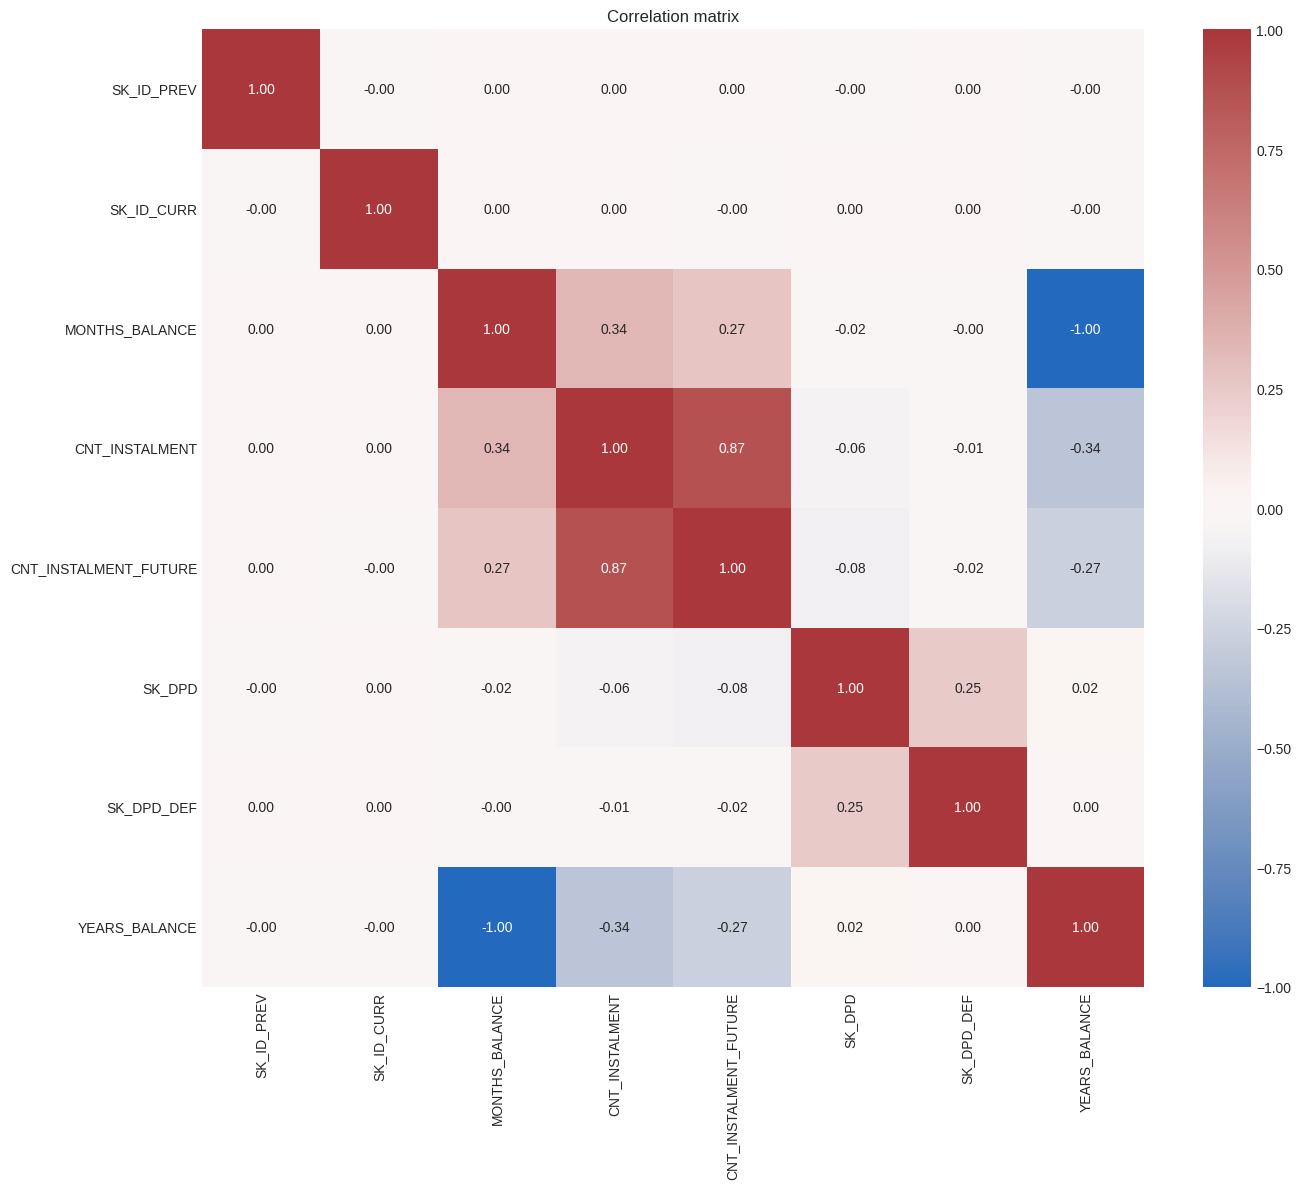

In [68]:
corr_cols = [col for col in numerical_cols if POS_CASH_balance[col].notna().sum() > 0]
correlation_matrix = POS_CASH_balance[corr_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='vlag')
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

In [69]:
print(f"Categorical columns: {categorical_cols}")
print()

for col in categorical_cols:
    print(previous_application[col].value_counts())
    print()

Categorical columns: ['NAME_CONTRACT_STATUS']

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64



# Instalments payments dataset

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.

There is a) one row for every payment that was made plus b) one row each for missed payment.

One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

In [75]:
instalments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [90]:
missing_instalments = instalments_payments.isnull().sum() / len(instalments_payments) * 100
print("Missing values (%):\n", missing_instalments[missing_instalments > 0])

Missing values (%):
 DAYS_ENTRY_PAYMENT    0.021352
AMT_PAYMENT           0.021352
AMT_DIFF              0.021352
DAYS_DIFF             0.021352
DPD                   0.021352
DBD                   0.021352
dtype: float64


In [82]:
instalments_payments['DPD'] = (instalments_payments['DAYS_ENTRY_PAYMENT'] - instalments_payments['DAYS_INSTALMENT']).clip(lower=0)
instalments_payments['DBD'] = (instalments_payments['DAYS_INSTALMENT'] - instalments_payments['DAYS_ENTRY_PAYMENT']).clip(lower=0)
instalments_payments['AMT_DIFF'] = instalments_payments['AMT_INSTALMENT'] - instalments_payments['AMT_PAYMENT']

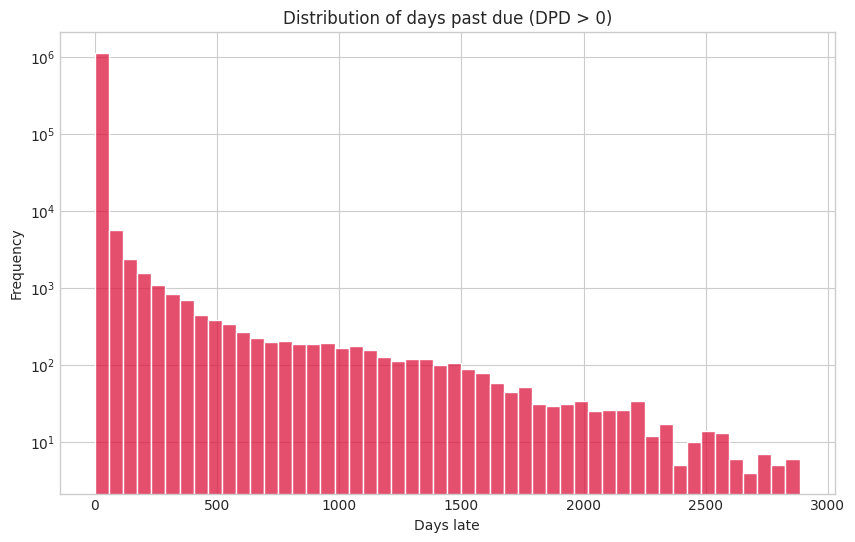

In [85]:
plt.figure(figsize=(10, 6))
late_data = instalments_payments[instalments_payments['DPD'] > 0]['DPD']

sns.histplot(late_data, bins=50, color='crimson', kde=False)
plt.yscale('log')
plt.title('Distribution of days past due (DPD > 0)')
plt.xlabel('Days late')
plt.ylabel('Frequency')
plt.show()

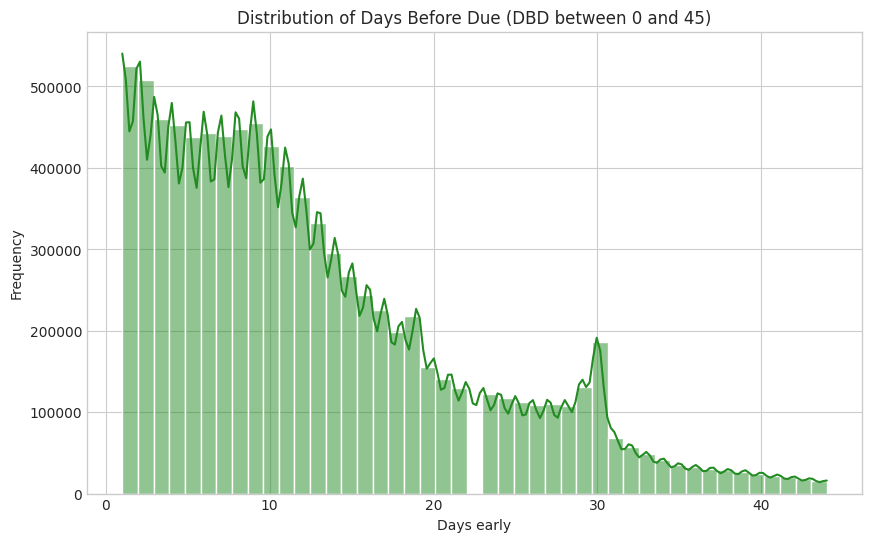

In [87]:
plt.figure(figsize=(10, 6))
early_data = instalments_payments[(instalments_payments['DBD'] > 0) & (instalments_payments['DBD'] < 45)]['DBD']

sns.histplot(early_data, bins=45, color='forestgreen', kde=True)
plt.title('Distribution of Days Before Due (DBD between 0 and 45)')
plt.xlabel('Days early')
plt.ylabel('Frequency')
plt.show()

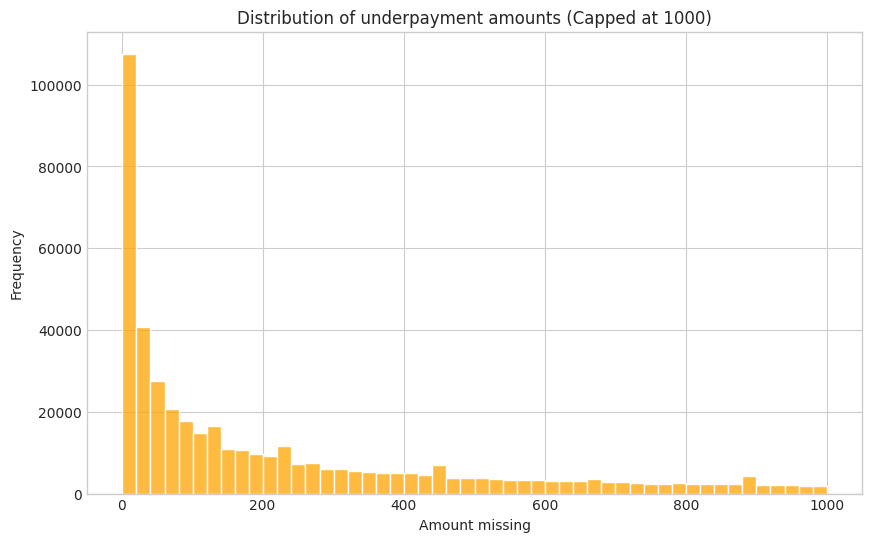

In [89]:
plt.figure(figsize=(10, 6))
underpayment_gap = instalments_payments[(instalments_payments['AMT_DIFF'] > 1) & (instalments_payments['AMT_DIFF'] < 1000)]['AMT_DIFF']

sns.histplot(underpayment_gap, bins=50, color='orange')
plt.title('Distribution of underpayment amounts (Capped at 1000)')
plt.xlabel('Amount missing')
plt.ylabel('Frequency')
plt.show()

In [71]:
numerical_cols = instalments_payments.select_dtypes(include=['int64', 'float64']).columns.tolist()

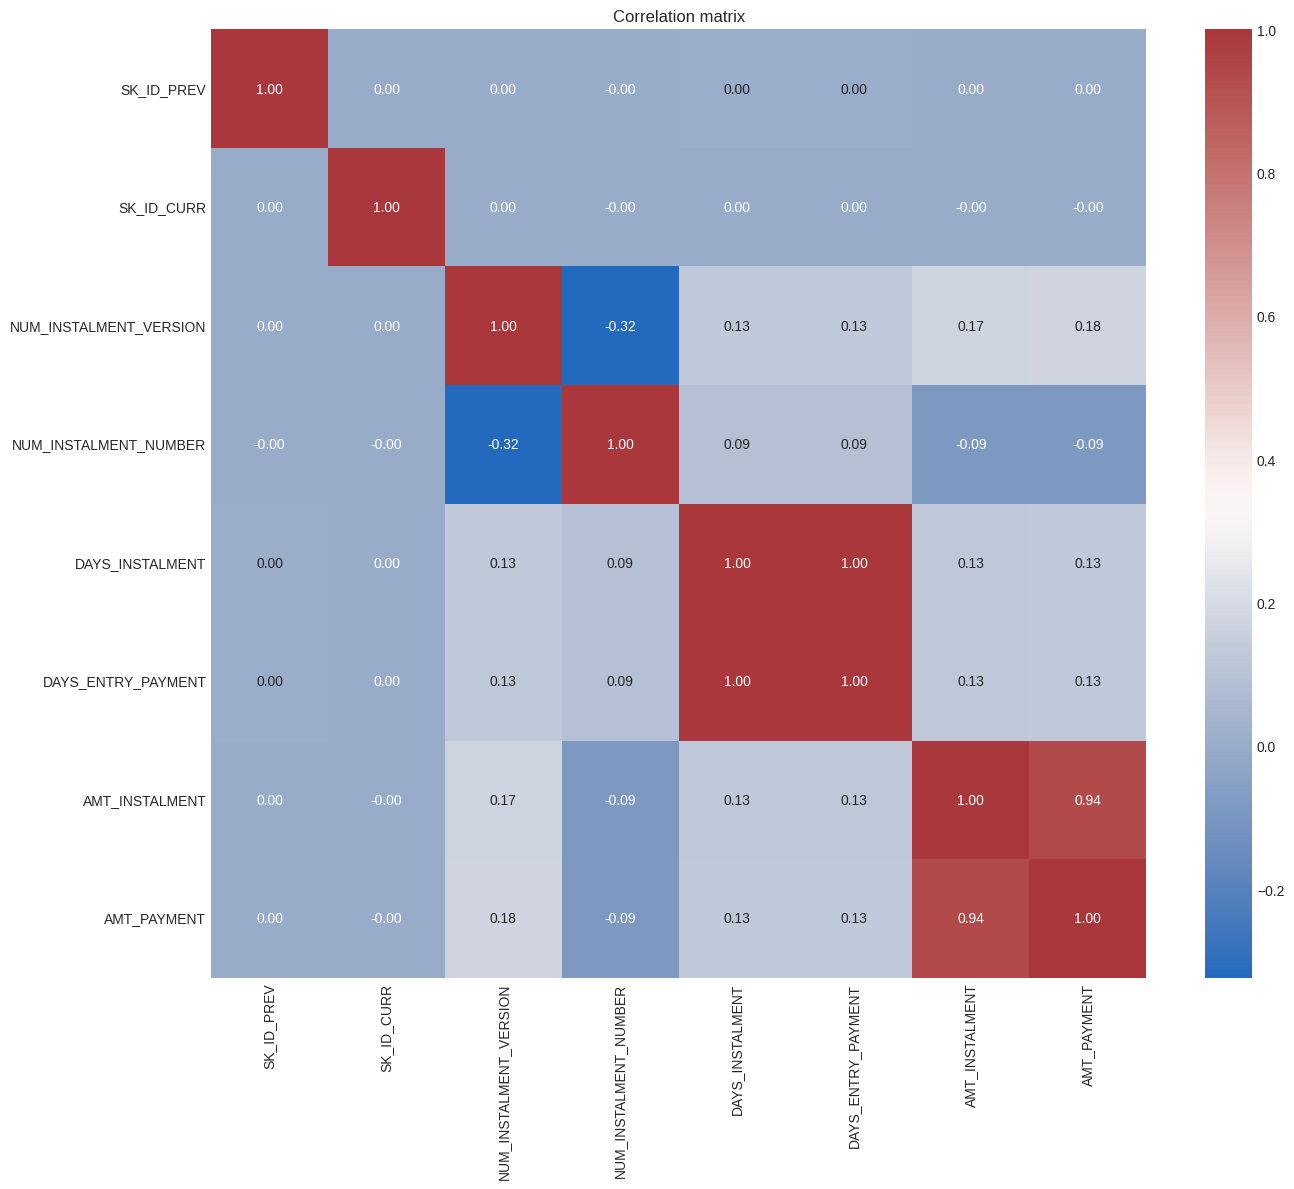

In [73]:
corr_cols = [col for col in numerical_cols if instalments_payments[col].notna().sum() > 0]
correlation_matrix = instalments_payments[corr_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='vlag')
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

# Credit card balance dataest

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.

This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

In [95]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


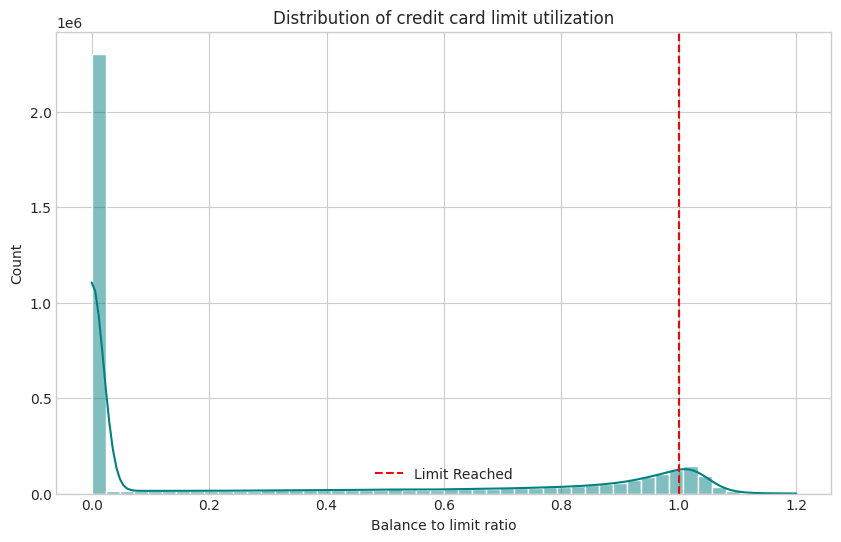

In [101]:
credit_card_balance['LIMIT_USE_RATIO'] = credit_card_balance['AMT_BALANCE'] / credit_card_balance['AMT_CREDIT_LIMIT_ACTUAL'].replace(0, 1)

plt.figure(figsize=(10, 6))
util_data = credit_card_balance[credit_card_balance['LIMIT_USE_RATIO'].between(0, 1.2)]['LIMIT_USE_RATIO']

sns.histplot(util_data, bins=50, kde=True, color='teal')
plt.axvline(1.0, color='red', linestyle='--', label='Limit Reached')
plt.title('Distribution of credit card limit utilization')
plt.xlabel('Balance to limit ratio')
plt.legend()
plt.show()

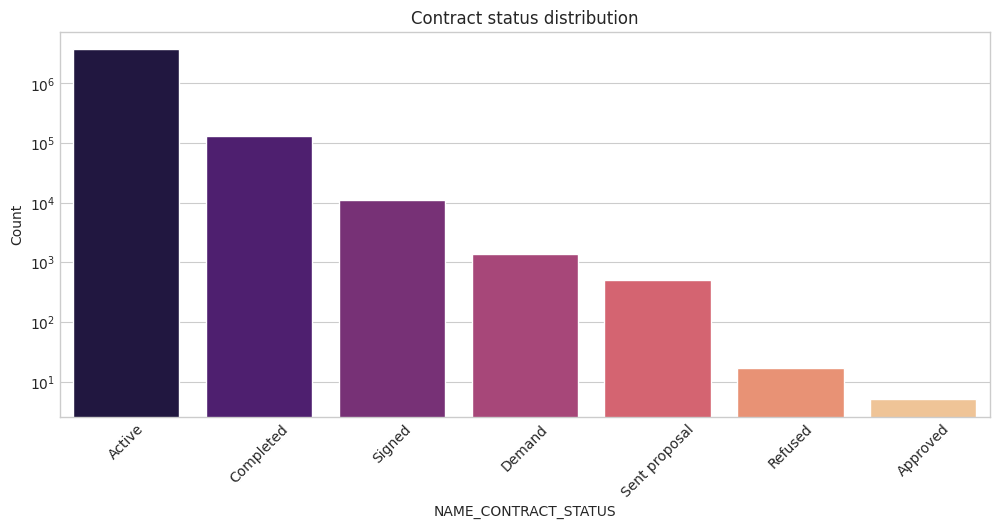

In [102]:
plt.figure(figsize=(12, 5))
status_counts = credit_card_balance['NAME_CONTRACT_STATUS'].value_counts()

sns.barplot(x=status_counts.index, y=status_counts.values, palette='magma')
plt.yscale('log')
plt.title('Contract status distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

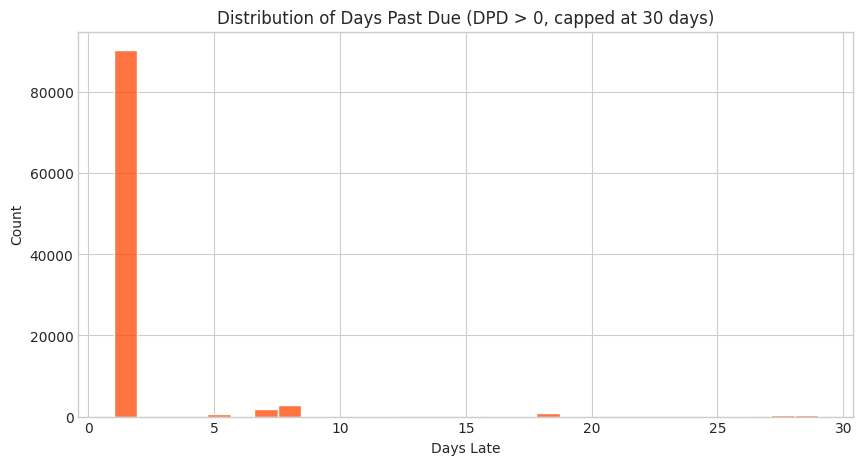

In [99]:
plt.figure(figsize=(10, 5))
# Filter only records with DPD > 0
late_cc = credit_card_balance[credit_card_balance['SK_DPD'] > 0]['SK_DPD']

if not late_cc.empty:
    sns.histplot(late_cc[late_cc < 30], bins=30, color='orangered') # Zoomed into 1 month
    plt.title('Distribution of Days Past Due (DPD > 0, capped at 30 days)')
    plt.xlabel('Days Late')
else:
    print("No DPD found in this sample.")
plt.show()

In [92]:
numerical_cols = credit_card_balance.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = credit_card_balance.select_dtypes(include=['object']).columns.tolist()

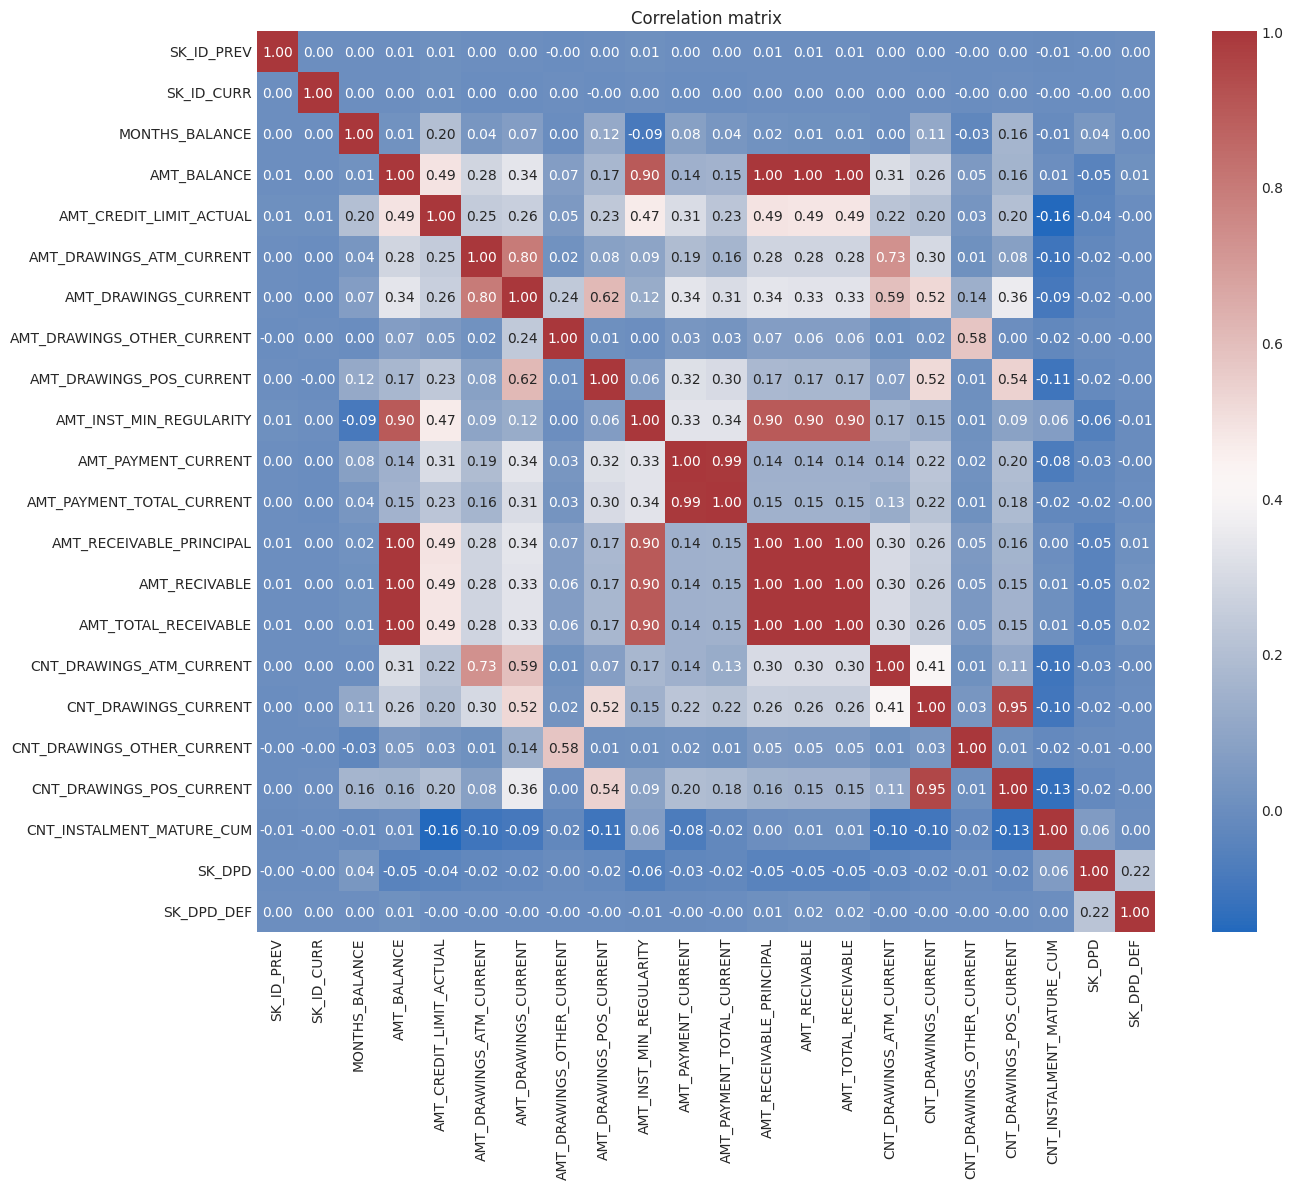

In [93]:
corr_cols = [col for col in numerical_cols if credit_card_balance[col].notna().sum() > 0]
correlation_matrix = credit_card_balance[corr_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='vlag')
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

In [94]:
print(f"Categorical columns: {categorical_cols}")
print()

for col in categorical_cols:
    print(previous_application[col].value_counts())
    print()

Categorical columns: ['NAME_CONTRACT_STATUS']

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64



# Features

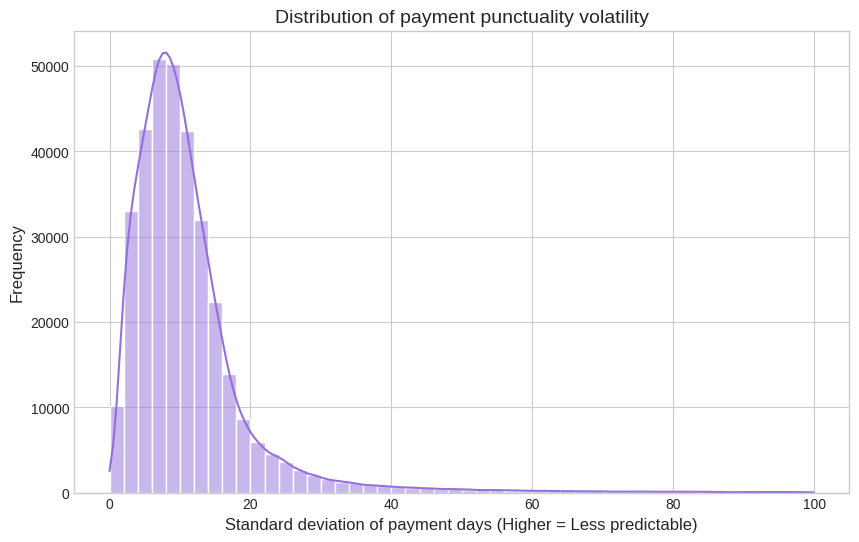

Payment volatility stats:
count    338610.000000
mean         12.548769
std          24.249069
min           0.000000
25%           5.953524
50%           9.275173
75%          13.490738
max        1989.798482
Name: PAYMENT_VOLATILITY, dtype: float64


In [3]:
instalments_payments['DAYS_DIFF_RAW'] = instalments_payments['DAYS_ENTRY_PAYMENT'] - instalments_payments['DAYS_INSTALMENT']

payment_stability = instalments_payments.groupby('SK_ID_CURR')['DAYS_DIFF_RAW'].std().reset_index()
payment_stability.columns = ['SK_ID_CURR', 'PAYMENT_VOLATILITY']

plt.figure(figsize=(10, 6))
sns.histplot(payment_stability[payment_stability['PAYMENT_VOLATILITY'] < 100]['PAYMENT_VOLATILITY'],
             bins=50, color='mediumpurple', kde=True)

plt.title('Distribution of payment punctuality volatility', fontsize=14)
plt.xlabel('Standard deviation of payment days (Higher = Less predictable)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

print("Payment volatility stats:")
print(payment_stability['PAYMENT_VOLATILITY'].describe())

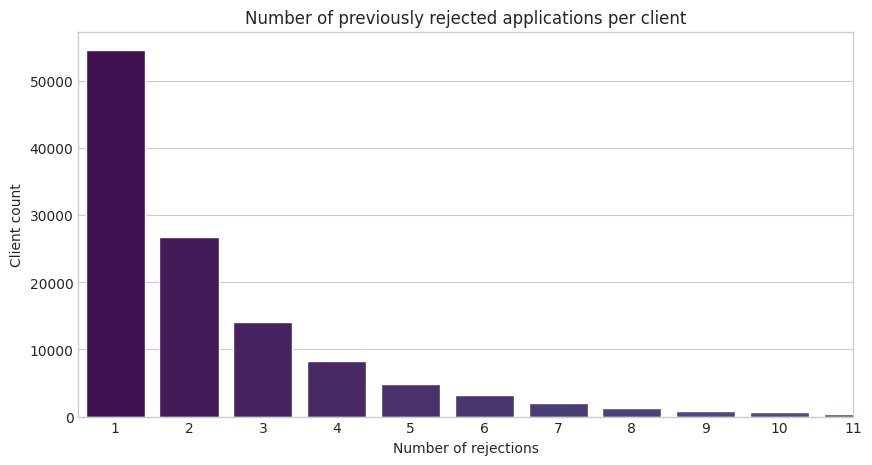

In [110]:
prev_rejected = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Refused']
prev_rejected_count = prev_rejected.groupby('SK_ID_CURR').size().reset_index()
prev_rejected_count.columns = ['SK_ID_CURR', 'PREV_REJECTED_COUNT']

plt.figure(figsize=(10, 5))
sns.countplot(data=prev_rejected_count, x='PREV_REJECTED_COUNT', palette='viridis')
plt.xlim(-0.5, 10)
plt.title('Number of previously rejected applications per client')
plt.xlabel('Number of rejections')
plt.ylabel('Client count')
plt.show()

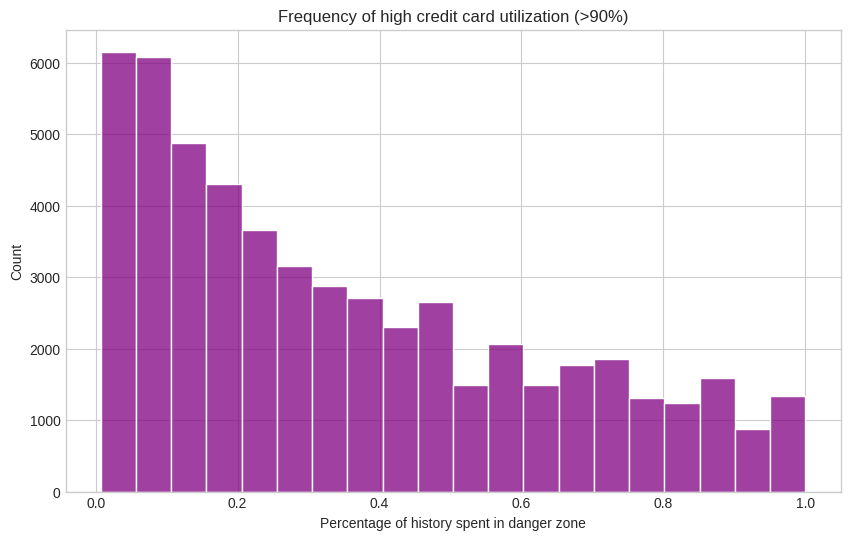

In [4]:
credit_card_balance['UTILIZATION'] = credit_card_balance['AMT_BALANCE'] / credit_card_balance['AMT_CREDIT_LIMIT_ACTUAL'].replace(0, 1)
credit_card_balance['HIGH_UTIL_FLAG'] = (credit_card_balance['UTILIZATION'] > 0.9).astype(int)

danger_zone = credit_card_balance.groupby('SK_ID_CURR')['HIGH_UTIL_FLAG'].mean().reset_index()
danger_zone.columns = ['SK_ID_CURR', 'CC_DANGER_ZONE_FREQ']

plt.figure(figsize=(10, 6))
sns.histplot(danger_zone[danger_zone['CC_DANGER_ZONE_FREQ'] > 0]['CC_DANGER_ZONE_FREQ'], bins=20, color='purple')
plt.title('Frequency of high credit card utilization (>90%)')
plt.xlabel('Percentage of history spent in danger zone')
plt.show()